In [1]:
from time import sleep
import numpy as np
import urllib3
import matplotlib
from numpy import append
import config
import vectorbt as vbt
import pandas as pd
import pandas_ta as ta
from datetime import datetime
from alpaca_trade_api.rest import REST
import gym
import gym_anytrading
from tensorflow.keras.models import load_model
import requests

from stable_baselines import ACKTR
from stable_baselines.common.evaluation import evaluate_policy

c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\90507\AppD

119

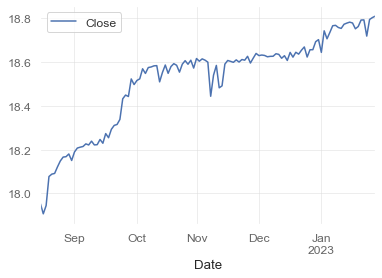

In [2]:
data = vbt.YFData.download(symbols= 'TRY=X', period="119d")
#df = vbt.Portfolio.from_holding(data, init_cash=100)
#print(data.data['TRYUSD=X']['Close'])
X=data.data['TRY=X'].index
Y=data.data['TRY=X'].Close
data.data['TRY=X'].reset_index().plot(x='Date', y='Close')
X=data.data['TRY=X']
liraDF = pd.DataFrame( X['Close'])
LiraArray = np.array(liraDF)
liraDF.size

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
testingSet = pd.DataFrame(liraDF)
testing_set_scaled = sc.fit_transform(testingSet)
testing_set_scaled

array([[0.05044011],
       [0.        ],
       [0.04174761],
       [0.18849916],
       [0.20077328],
       [0.20431271],
       [0.23737837],
       [0.26734966],
       [0.28703381],
       [0.28892376],
       [0.30273768],
       [0.2698492 ],
       [0.31291092],
       [0.33270687],
       [0.33705206],
       [0.3405029 ],
       [0.35384012],
       [0.34830105],
       [0.36765404],
       [0.34852042],
       [0.3497375 ],
       [0.37616935],
       [0.35700409],
       [0.40582847],
       [0.38490404],
       [0.4275924 ],
       [0.44729976],
       [0.45203307],
       [0.47746722],
       [0.58197546],
       [0.6007737 ],
       [0.59347546],
       [0.68238952],
       [0.65385678],
       [0.67453653],
       [0.68283248],
       [0.73370289],
       [0.71008064],
       [0.73989584],
       [0.74288053],
       [0.74852084],
       [0.74962823],
       [0.66756945],
       [0.71512402],
       [0.75272471],
       [0.71071133],
       [0.74498352],
       [0.759

In [4]:
inputs = liraDF[0:].values     #lstm input shape edit
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,liraDF.size):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
#X_test = np.reshape(X_test, (X_test.shape[0], 1))
#X_test = np.reshape(X_test, (int(X_test.size/60), 60,1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

C:\Users\90507\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [5]:
X_test

array([[[0.05044011],
        [0.        ],
        [0.04174761],
        ...,
        [0.78379918],
        [0.77738474],
        [0.76728955]],

       [[0.        ],
        [0.04174761],
        [0.18849916],
        ...,
        [0.77738474],
        [0.76728955],
        [0.59469254]],

       [[0.04174761],
        [0.18849916],
        [0.20077328],
        ...,
        [0.76728955],
        [0.59469254],
        [0.70141134]],

       ...,

       [[0.7719659 ],
        [0.78379918],
        [0.77738474],
        ...,
        [0.98031585],
        [0.98103513],
        [0.8990776 ]],

       [[0.78379918],
        [0.77738474],
        [0.76728955],
        ...,
        [0.98103513],
        [0.8990776 ],
        [0.98311491]],

       [[0.77738474],
        [0.76728955],
        [0.59469254],
        ...,
        [0.8990776 ],
        [0.98311491],
        [0.99281356]]])

In [6]:
lira_model = load_model('Lira_BOT.bot')
predicted_close_value = lira_model.predict(X_test)
predicted_close_value = sc.inverse_transform(predicted_close_value)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
predicted_close_value = pd.DataFrame(predicted_close_value)
predicted_close_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       59 non-null     float32
dtypes: float32(1)
memory usage: 364.0 bytes


In [8]:
from scipy.stats import pearsonr
from pingouin import corr
from researchpy.correlation import corr_case

In [9]:
predictions_TRY = predicted_close_value
%store -r predictions_SOL2

In [10]:
predictions_all = np.array([predictions_TRY,predictions_SOL2])

In [11]:
print(predictions_all[0][0:5])
print(predictions_all[1][0:5])
change_try = np.zeros(predictions_all[0].size-1)
change_sol = np.zeros(predictions_all[0].size-1)

[[18.634155]
 [18.62409 ]
 [18.607893]
 [18.59428 ]
 [18.580406]]
[[3.718985 ]
 [3.7342997]
 [3.738036 ]
 [3.747687 ]
 [3.7658548]]


In [12]:
for i in range(1,len(predictions_all[0])):
    change_try[i-1] = 100 * (predictions_all[0][i] - predictions_all[0][i-1]) / predictions_all[0][i-1]
    change_sol[i-1] = 100 * (predictions_all[1][i] - predictions_all[1][i-1]) / predictions_all[1][i-1]

In [13]:
print(change_try[-5:]," *** " ,predictions_all[0][-5:])
print(change_sol[-5:]," *** ",predictions_all[1][-5:])

[-0.00131895  0.00966907 -0.01187974 -0.00836043  0.00877716]  ***  [[18.79915 ]
 [18.800968]
 [18.798735]
 [18.797163]
 [18.798813]]
[ 0.47863328 -1.29259121  0.48643672  0.59832573 -0.96554464]  ***  [[3.8440506]
 [3.7943628]
 [3.81282  ]
 [3.835633 ]
 [3.7985983]]


In [14]:
print(change_sol.size," *** ",predictions_all[1].size)

58  ***  59


In [15]:
predictions_all[0] = predictions_all[0] * 0.488 * 0.71 / 1.56
predictions_all[1] = predictions_all[1] * 0.369 * 0.86 / 1.56

In [16]:
changes_all = np.array([change_try, change_sol])
print(changes_all[0][0]," *** ",changes_all[1][0])

-0.054014138877391815  ***  0.4117945730686188


In [17]:
latest_eth = vbt.YFData.download(symbols= 'ETH-USD', period="60d").get('Close')

C:\Users\90507\AppData\Roaming\Python\Python37\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\Users\90507\AppData\Roaming\Python\Python37\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [18]:
gas_dummy = pd.read_csv("AvgGasPrice.csv")
gas_dummy = gas_dummy[-59:].reset_index()
gas_prices = np.array(gas_dummy["Value (Wei)"])
gas_prices = np.append(gas_prices,gas_prices[-1])
gas_prices = gas_prices * 10e-10
gas_prices = gas_prices * 21000 
gas_prices = gas_prices * 10e-10
gas_prices[-3:]

array([0.000439  , 0.00038022, 0.00038022])

In [19]:
buy_sel_signal = np.array([])
one_hundred_dollar = (100 + gas_prices[0] * latest_eth[0]) / latest_eth[0]
for i in range(len(changes_all[0])):
    one_hundred_dollar = (100+gas_prices[i] * latest_eth[i]) / latest_eth[i]
    if(changes_all[0][i] * changes_all[1][0] > 0):
        if(np.abs((changes_all[0][i] + changes_all[1][i])/2) >= one_hundred_dollar):
            if(changes_all[0][i] < 0):
                buy_sel_signal = np.append(buy_sel_signal, -1)
            else:
                buy_sel_signal = np.append(buy_sel_signal, 1)
        else:
            buy_sel_signal = np.append(buy_sel_signal, 0)
    else:
        buy_sel_signal = np.append(buy_sel_signal,0)

In [20]:
total_eth = 10000 / latest_eth[0]
total_money = 10000
position = []
for i in range(len(buy_sel_signal)):
    if buy_sel_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
    
for i in range(len(buy_sel_signal)):
    if buy_sel_signal[i] == 0 :
        position[i] = 1
    elif buy_sel_signal[i] == -1  or buy_sel_signal[i] == 1:
        position[i] = 0
    else:
        position[i] = position[i-1]

In [21]:
total_records = np.array([buy_sel_signal,buy_sel_signal])
for i in range(len(buy_sel_signal)):
    total_records[0][i] = total_money
    total_records[1][i] = total_eth
    one_hundred_dollar = (100+gas_prices[i] * latest_eth[i]) / latest_eth[i]
    if(buy_sel_signal[i]!=0 and position[i]!=1):
        if(buy_sel_signal[i]==1):
            total_eth +=  one_hundred_dollar
            total_money = total_money - 100 - gas_prices[i] * latest_eth[i] - 0.001*(100 + gas_prices[i] * latest_eth[i])
        elif(buy_sel_signal[i]==-1):
            total_eth -=  one_hundred_dollar
            total_money = total_money + 100 - gas_prices[i] * latest_eth[i] - 0.001*(100 + gas_prices[i] * latest_eth[i])

In [22]:
print(total_money," *** ",total_eth * latest_eth[-1])
print(" ***** ")
print(total_records[0][4:8], " *** ", total_records[1][4:8])

6876.474731551505  ***  15799.067469393347
 ***** 
[10000.         10000.         10000.          9899.01444141]  ***  [7.71790383 7.71790383 7.71790383 7.79723727]


In [23]:
print("Starting Money = $10K")
print("Starting Ethereum = ",(10000 / latest_eth[0]),"ETH")
print("Last Total Money = ", total_money+(total_eth*latest_eth[-1]))
profit = 100 * (total_money+(total_eth*latest_eth[-1]) -20000) / 20000
print("Profit = %",profit)

Starting Money = $10K
Starting Ethereum =  7.717903831639656 ETH
Last Total Money =  22675.542200944852
Profit = % 13.37771100472426


In [24]:
control = 0
for i in range(len(buy_sel_signal)):
    #if(buy_sel_signal[i]==1):
        #print("It is a buy order after ",i+1," days")
    if(buy_sel_signal[i]==1):
        control = control + 1
        #print("It is a sell order after ",i+1," days")
    #dollar_100 = (100+gas_prices[i] * latest_eth[i]) / latest_eth[i]
    #print(np.abs((changes_all[0][i] + changes_all[1][i])/2)," *** ",dollar_100)
    #print(changes_all[0][i] ," *** ", changes_all[1][i]," *** ",dollar_100)
print(control)

31


In [25]:
for i in range(change_try.size):
    if(change_try[i]<0):
        print(change_try[i]," *** ",change_sol[i])

-0.054014138877391815  ***  0.4117945730686188
-0.08696910738945007  ***  0.10005243122577667
-0.07315576821565628  ***  0.2581886351108551
-0.07461463660001755  ***  0.4847719073295593
-0.07802712917327881  ***  0.0863746702671051
-0.04126821830868721  ***  0.4385283887386322
-0.0003373283543623984  ***  0.7394713163375854
-0.0031586308032274246  ***  0.5733285546302795
-0.011786460876464844  ***  -0.5886510014533997
-0.0059092603623867035  ***  -0.12462720274925232
-0.002954804804176092  ***  -0.2238992303609848
-0.006675488315522671  ***  -0.03452560305595398
-0.0013189534656703472  ***  0.4786332845687866
-0.011879735626280308  ***  0.48643672466278076
-0.008360431529581547  ***  0.5983257293701172
